In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

In [3]:
df  = pd.read_csv('balanced-classes/train.csv')
df.shape
df.head()

(13140, 9)

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,0.0,0.0,0.0,1.0,0.0,1837.29,312574.95,310737.67,0
1,0.0,1.0,0.0,0.0,0.0,352282.54,33.00,0.00,0
2,0.0,0.0,0.0,0.0,1.0,1777758.65,1777758.65,0.00,1
3,0.0,0.0,0.0,1.0,0.0,2463.98,735807.26,733343.28,0
4,0.0,1.0,0.0,0.0,0.0,37100.29,37100.29,0.00,1


In [4]:
X = df.iloc[:,0:8]
y =  df.iloc[:,8]
y.shape
X.shape

(13140,)

(13140, 8)

In [5]:
rf = RandomForestClassifier()

In [7]:
cv_results = cross_validate(rf, X, y, cv = 5, scoring="accuracy", n_jobs=-1, return_estimator=True)


In [9]:
print(cv_results)
cv_results['test_score']

{'fit_time': array([0.05833507, 0.05537701, 0.05535293, 0.05411315, 0.05362201]), 'score_time': array([0.00383806, 0.00415897, 0.00370216, 0.00373197, 0.00376081]), 'estimator': (RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_

array([0.99315329, 0.99315068, 0.99429224, 0.99543379, 0.9939094 ])

In [11]:
model = cv_results['estimator'][4]

In [12]:
y_pred = model.predict(X)

In [13]:
from sklearn import metrics
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes,
                                           digits=4) 
    print(report)

In [14]:
get_metrics(y, y_pred)
display_classification_report(y, y_pred)

Accuracy: 0.9981
Precision: 0.9981
Recall: 0.9981
F1 Score: 0.9981
              precision    recall  f1-score   support

           1     0.9979    0.9983    0.9981      6579
           0     0.9983    0.9979    0.9981      6561

    accuracy                         0.9981     13140
   macro avg     0.9981    0.9981    0.9981     13140
weighted avg     0.9981    0.9981    0.9981     13140



In [50]:

conf_mat = confusion_matrix(y, y_pred)

dataframe = pd.DataFrame(conf_mat)
dataframe.head()




,0,1
0,6547,14
1,11,6568


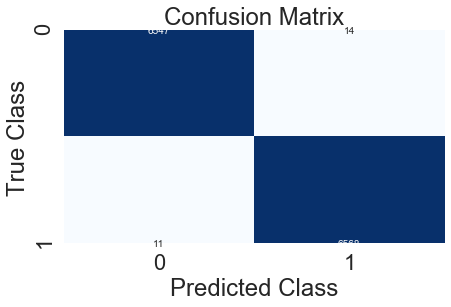

In [51]:
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt='g');
plt.title("Confusion Matrix"), plt.tight_layout();
plt.ylabel("True Class"), plt.xlabel("Predicted Class");
plt.show();

In [52]:
imp_features = pd.DataFrame()
imp_features['feature'] = X.columns
imp_features['importance'] = model.feature_importances_
imp_features.sort_values(by=['importance'], ascending=True, inplace=True)
imp_features.set_index('feature', inplace=True)

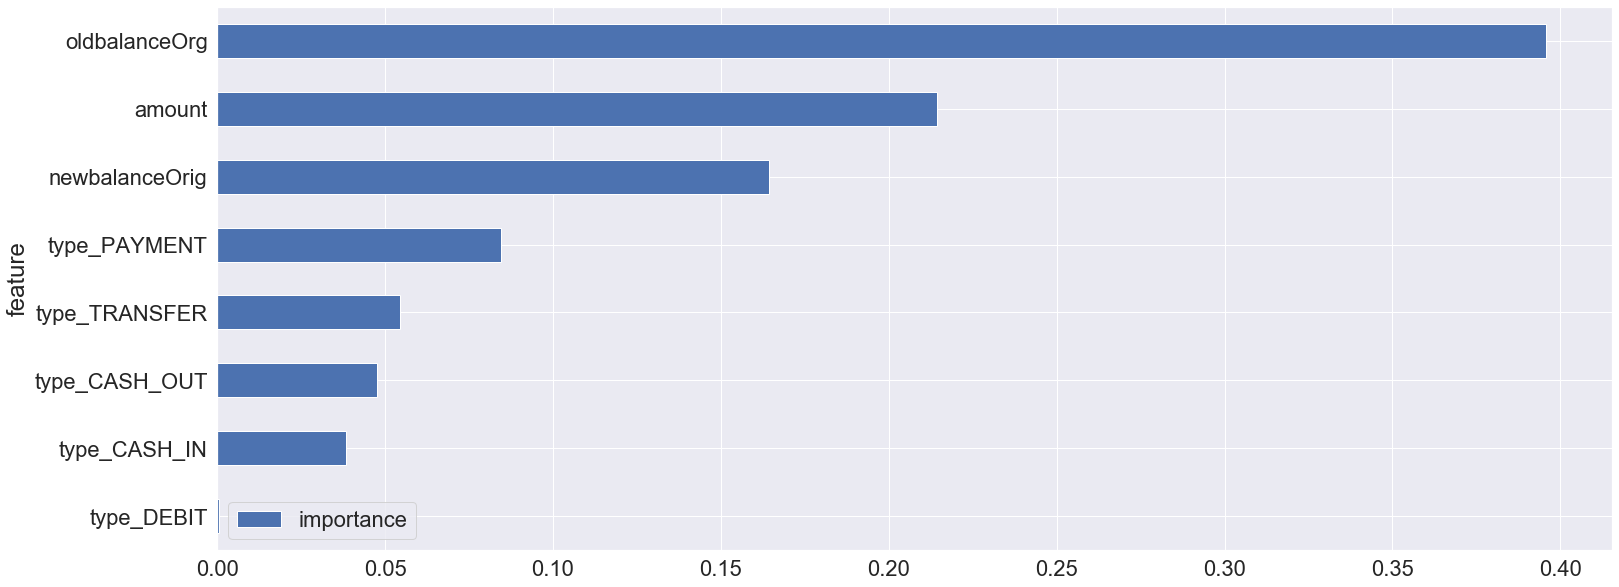

In [53]:
imp_features.plot(kind='barh', figsize=(25, 10))

# prediction on test data

In [54]:
test_df  = pd.read_csv('balanced-classes/test.csv')
test_df.shape
test_df.head()

(3286, 9)

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,0.0,0.0,0.0,1.0,0.0,5919.05,22686.0,16766.95,0
1,0.0,0.0,0.0,1.0,0.0,3492.66,1084.0,0.00,0
2,0.0,0.0,0.0,1.0,0.0,15078.39,0.0,0.00,0
3,0.0,0.0,0.0,1.0,0.0,11585.29,0.0,0.00,0
4,0.0,1.0,0.0,0.0,0.0,114940.19,15336.0,0.00,0


In [55]:
X_test = test_df.iloc[:,0:8]
y_test =  test_df.iloc[:,8]
y_test.shape
X_test.shape

(3286,)

(3286, 8)

In [56]:
y_pred_test = model.predict(X_test)

In [58]:
get_metrics(y_test, y_pred_test)
display_classification_report(y_test, y_pred_test)

Accuracy: 0.9918
Precision: 0.9918
Recall: 0.9918
F1 Score: 0.9918
              precision    recall  f1-score   support

           1     0.9939    0.9896    0.9917      1634
           0     0.9898    0.9939    0.9918      1652

    accuracy                         0.9918      3286
   macro avg     0.9918    0.9918    0.9918      3286
weighted avg     0.9918    0.9918    0.9918      3286



In [57]:
conf_mat_test = confusion_matrix(y_test, y_pred_test)

dataframe_test = pd.DataFrame(conf_mat_test)
dataframe_test.head()

,0,1
0,1642,10
1,17,1617


# prediction on full data set

In [59]:
full_train_df  = pd.read_csv('imbalanced-classes/train.csv')
full_train_df.shape
full_train_df.head()

(5090096, 9)

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,1.0,0.0,0.0,0.0,0.0,150255.19,5551.00,155806.19,0
1,1.0,0.0,0.0,0.0,0.0,74939.55,13378804.32,13453743.87,0
2,0.0,0.0,0.0,0.0,1.0,239494.42,6524.42,0.00,0
3,1.0,0.0,0.0,0.0,0.0,58610.47,14448986.61,14507597.08,0
4,0.0,0.0,0.0,1.0,0.0,8090.81,1561.30,0.00,0


In [60]:
X_full_train = full_train_df.iloc[:,0:8]
y_full_train =  full_train_df.iloc[:,8]
X_full_train.shape
y_full_train.shape

(5090096, 8)

(5090096,)

In [61]:
y_pred_full_train = model.predict(X_full_train)

In [62]:
get_metrics(y_full_train, y_pred_full_train)
display_classification_report(y_full_train, y_pred_full_train)

Accuracy: 0.991
Precision: 0.9989
Recall: 0.991
F1 Score: 0.9945
              precision    recall  f1-score   support

           1     0.1241    0.9969    0.2208      6522
           0     1.0000    0.9910    0.9955   5083574

    accuracy                         0.9910   5090096
   macro avg     0.5621    0.9940    0.6081   5090096
weighted avg     0.9989    0.9910    0.9945   5090096

